# Image Augmentation

Image augmentation involves altering images that are fed into the neural network model. There are several options, such as mirroring an image ("horizontal flip"), shifting, zooming, brightening/darkening, rotating, normalizing, etc. The goal of all of this is to alter images in ways that the model might realistically see "in the wild" and artificially increase the size of the dataset.

In this notebook, I'll experiment with different image augmentation options and strategies, visualizing and saving the resulting images for later reference. The results of this experimentation will be used in further model iterations in other notebooks.

## Keras `ImageDataGenerator` parameters

I'll start by using the parameters and options native to Keras in the class I'm already using.

In [14]:
import os
import numpy as np
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from functions import get_images

I'll experiment using images from the processed dataset since I don't want to touch the actual input images.

In [59]:
# Directory
img_dir = 'other_images/processed_images/'
open_dir = os.path.join(img_dir, 'open_bike_lane')
vehicle_dir = os.path.join(img_dir, 'vehicle_bike_lane')

In [60]:
def prep_imgs_for_aug(img_dir):
    # Using code from https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
    # Get filenames
    name = os.listdir(img_dir)[0]
    # Get images
    img = load_img(os.path.join(img_dir, name))
    # Convert to numpy array
    data = img_to_array(img)
    # Expand dimensions
    samples = np.expand_dims(data, 0)
    
    return samples

In [61]:
open_samples = prep_imgs_for_aug(open_dir)
vehicle_samples = prep_imgs_for_aug(vehicle_dir)

In [75]:
def plot_samples(iterator):
    # Generate some samples of altered images
    for i in range(9):
        plt.subplot(330 + 1 + i)
        # Get batch of images
        batch = iterator.next()
        # Convert to unsigned int for viewing
        img = batch[0].astype('uint8')
        # Plot image
        plt.imshow(img)
    plt.show()
    return

### Horizontal Flip

In [76]:
# Create generator
flip_datagen = ImageDataGenerator(horizontal_flip=True)

# Prepare image iterators
open_it = flip_datagen.flow(open_samples, batch_size=1)
vehicle_it = flip_datagen.flow(vehicle_samples, batch_size=1)

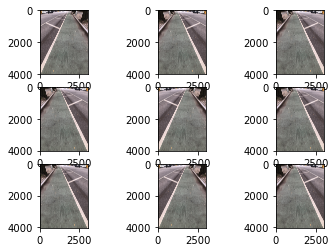

In [77]:
# Generate some samples of open images
plot_samples(open_it)

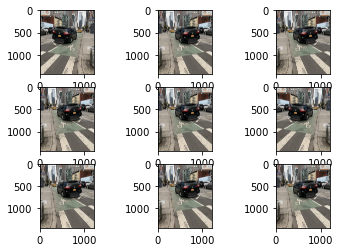

In [78]:
# Generate some samples of vehicle images
plot_samples(vehicle_it)

Huzzah! Horizontal flip is randomly applied to some images.

### Rotation

In [79]:
# Create generator
rot_datagen = ImageDataGenerator(rotation_range=30)

# Prepare image iterators
open_it = rot_datagen.flow(open_samples, batch_size=1)
vehicle_it = rot_datagen.flow(vehicle_samples, batch_size=1)

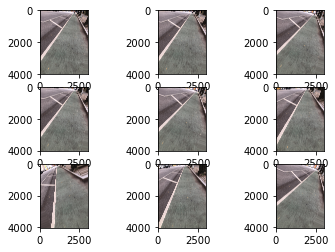

In [80]:
# Generate some samples of open images
plot_samples(open_it)

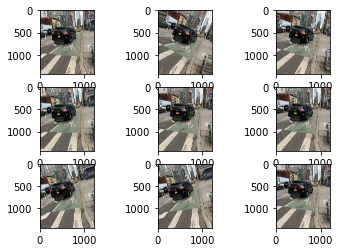

In [81]:
# Generate some samples of vehicle images
plot_samples(vehicle_it)

### Brightness

In [93]:
# Create generator
bright_datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])

# Prepare image iterators
open_it = bright_datagen.flow(open_samples, batch_size=1)
vehicle_it = bright_datagen.flow(vehicle_samples, batch_size=1)

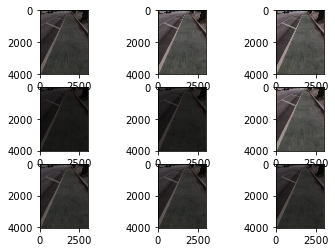

In [94]:
# Generate some samples of vehicle images
plot_samples(open_it)

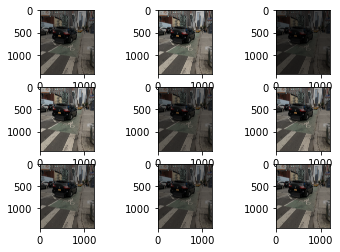

In [95]:
# Generate some samples of vehicle images
plot_samples(vehicle_it)

### Shear range

Kind of like a rotation and zoom in one; stretching image toward one end?

In [96]:
# Create generator
shear_datagen = ImageDataGenerator(shear_range=.9)

# Prepare image iterators
open_it = shear_datagen.flow(open_samples, batch_size=1)
vehicle_it = shear_datagen.flow(vehicle_samples, batch_size=1)

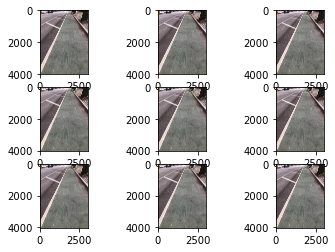

In [97]:
# Generate some samples of vehicle images
plot_samples(open_it)

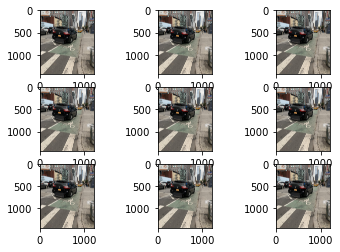

In [98]:
# Generate some samples of vehicle images
plot_samples(vehicle_it)

Seems to have a small effect? Not really sure--not easy to detect in images of this size perhaps.

### Zoom range

In [99]:
# Create generator
zoom_datagen = ImageDataGenerator(zoom_range=.2)

# Prepare image iterators
open_it = zoom_datagen.flow(open_samples, batch_size=1)
vehicle_it = zoom_datagen.flow(vehicle_samples, batch_size=1)

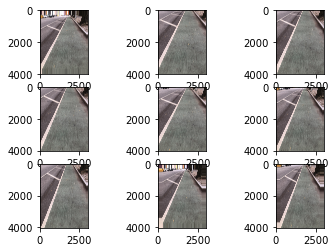

In [100]:
# Generate some samples of vehicle images
plot_samples(open_it)

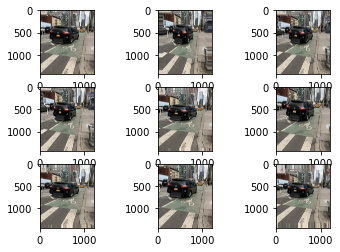

In [101]:
# Generate some samples of vehicle images
plot_samples(vehicle_it)

### Channel shift range

In [108]:
# Create generator
channel_datagen = ImageDataGenerator(channel_shift_range=.9)

# Prepare image iterators
open_it = channel_datagen.flow(open_samples, batch_size=1)
vehicle_it = channel_datagen.flow(vehicle_samples, batch_size=1)

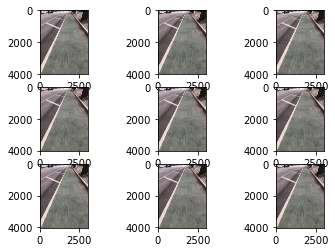

In [109]:
# Generate some samples of vehicle images
plot_samples(open_it)

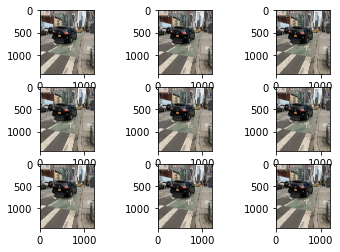

In [110]:
# Generate some samples of vehicle images
plot_samples(vehicle_it)

Not clear what effect this has.

### Width and height shifts

In [111]:
# Create generator
shift_datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# Prepare image iterators
open_it = shift_datagen.flow(open_samples, batch_size=1)
vehicle_it = shift_datagen.flow(vehicle_samples, batch_size=1)

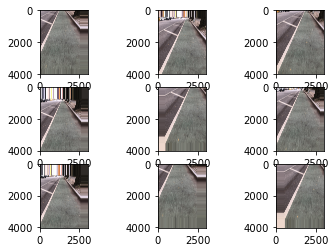

In [112]:
# Generate some samples of vehicle images
plot_samples(open_it)

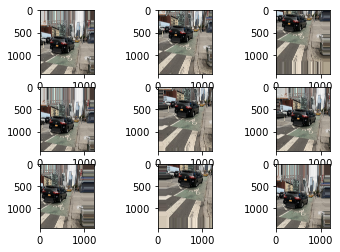

In [113]:
# Generate some samples of vehicle images
plot_samples(vehicle_it)